<a href="https://colab.research.google.com/github/theouterlimitz/global-power-plant-database/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_final = pd.read_pickle('analytical_data.pkl')
# ... continue with the rest of the EDA code ...

EDA Step 1: Analyze Water Stress by Fuel Type

The Question: How does baseline water stress differ across the most common types of power plants?

Loading the final analytical dataset...
Dataset loaded successfully.

Generating box plot of water stress scores by primary fuel type...


<ipython-input-2-be3a1eb81842>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_fuels,
<ipython-input-2-be3a1eb81842>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


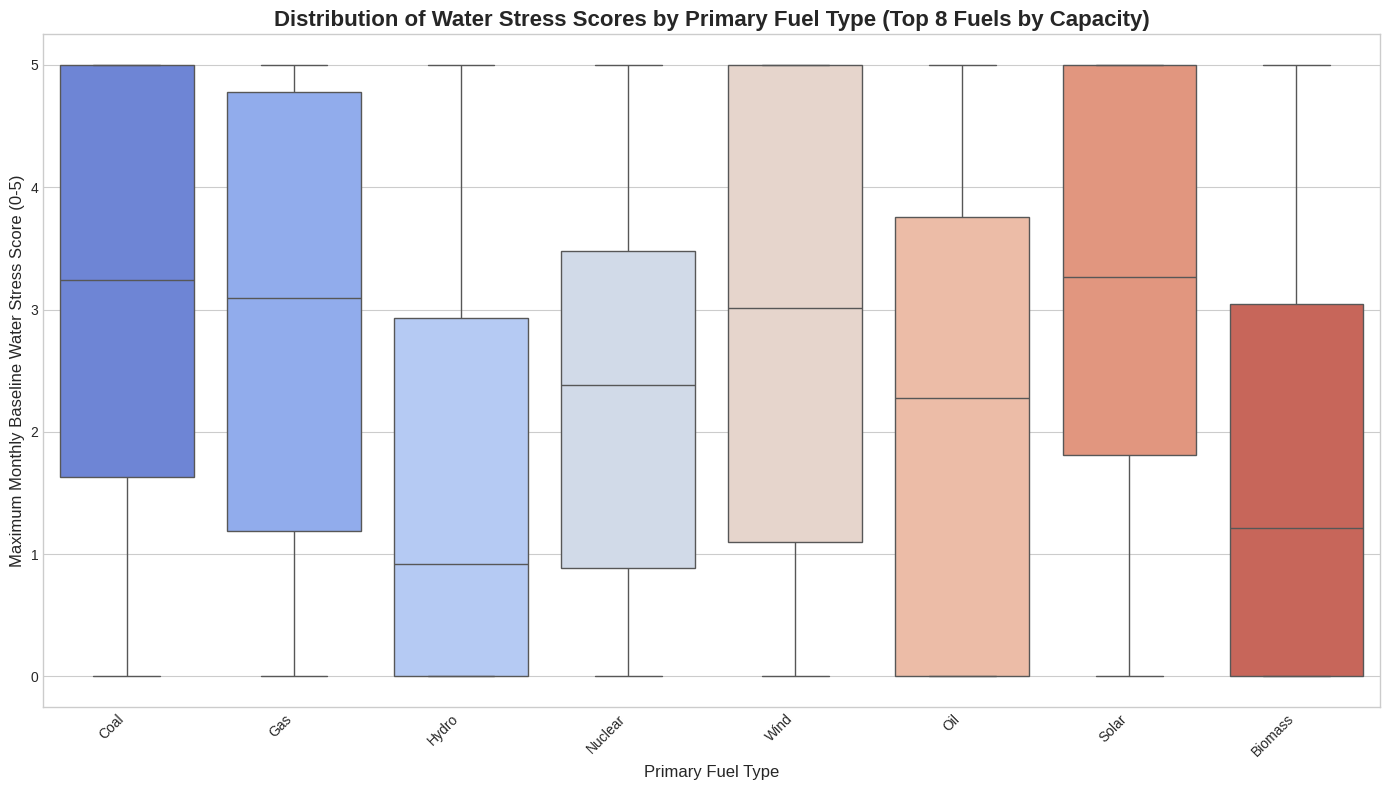

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Your Final Analytical Dataset ---
# We start here for all future analysis!
print("Loading the final analytical dataset...")
try:
    df_final = pd.read_pickle('analytical_data.pkl')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'analytical_data.pkl' not found. Please ensure the file is in your Colab session.")
    # If the file is missing, you may need to re-run your Data Curation notebook to generate it.
    # Or upload it if you have it saved locally.


# --- Step 2: Prepare Data for this Analysis ---

# We already created the 'max_monthly_bws_score' and 'annual_bws_label'
# in our last script. Let's recreate them here to be safe.

# Identify all the monthly baseline water stress SCORE columns
bws_score_cols = [f'bws_{month:02d}_score' for month in range(1, 13)]
# For each power plant (row), find the maximum score it experiences across the 12 months
df_final['max_monthly_bws_score'] = df_final[bws_score_cols].max(axis=1)

# For this plot, let's focus on the top 8 most common fuel types by capacity
top_fuels = df_final.groupby('primary_fuel')['capacity_mw'].sum().nlargest(8).index
df_top_fuels = df_final[df_final['primary_fuel'].isin(top_fuels)]


# --- Step 3: Visualize the Distribution ---
print("\nGenerating box plot of water stress scores by primary fuel type...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=df_top_fuels,
            x='primary_fuel',
            y='max_monthly_bws_score',
            ax=ax,
            order=top_fuels, # Ensure a consistent order
            palette='coolwarm')

ax.set_title('Distribution of Water Stress Scores by Primary Fuel Type (Top 8 Fuels by Capacity)', fontsize=16, fontweight='bold')
ax.set_xlabel('Primary Fuel Type', fontsize=12)
ax.set_ylabel('Maximum Monthly Baseline Water Stress Score (0-5)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

The Insight/Observation:

High-Risk Profiles: Coal, Gas, Solar, and Oil plants show the highest median water stress scores, indicating they are frequently sited in water-stressed regions.

Low-Risk Profile: Wind power stands out with a very low median water stress score, highlighting a key advantage in terms of water-related risk.

Mixed-Risk Profile: Hydropower has a lower median risk but a very wide distribution, reflecting its dependence on rivers in various climates.